In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DY Online Shoppers Intention/online_shoppers_intention.csv")

In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go


In [17]:
print(data.shape)

(12330, 18)


In [18]:
# checking the head of the data

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data.isnull().sum().sum()

0

**Uni-Variate Analysis**

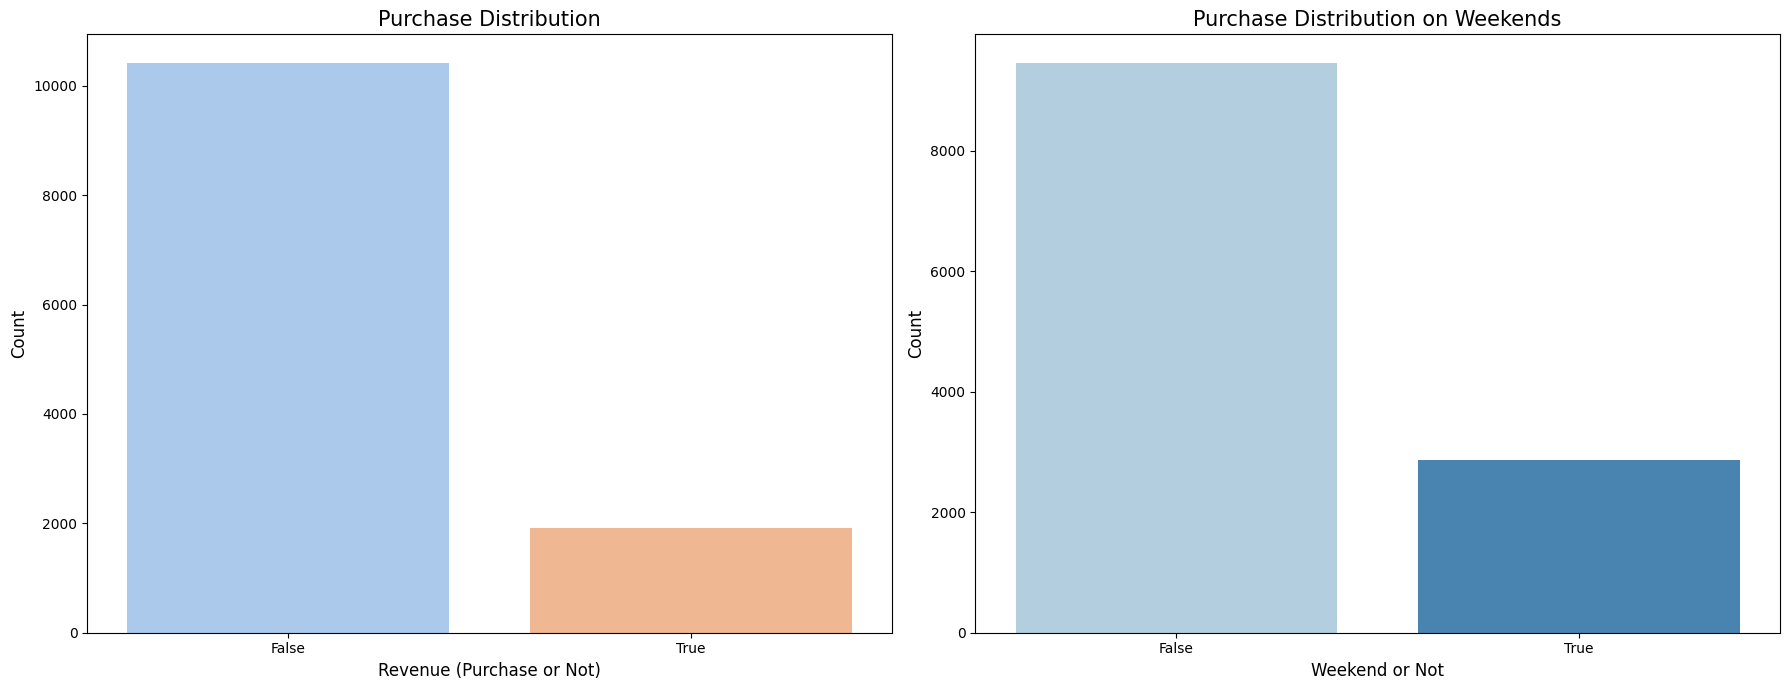

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 7)

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2)

# Plotting the first subplot
sns.countplot(data=data, x='Revenue', palette='pastel', ax=axes[0])
axes[0].set_title('Purchase Distribution', fontsize=15)
axes[0].set_xlabel('Revenue (Purchase or Not)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Plotting the second subplot
sns.countplot(data=data, x='Weekend', palette='Blues', ax=axes[1])
axes[1].set_title('Purchase Distribution on Weekends', fontsize=15)
axes[1].set_xlabel('Weekend or Not', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

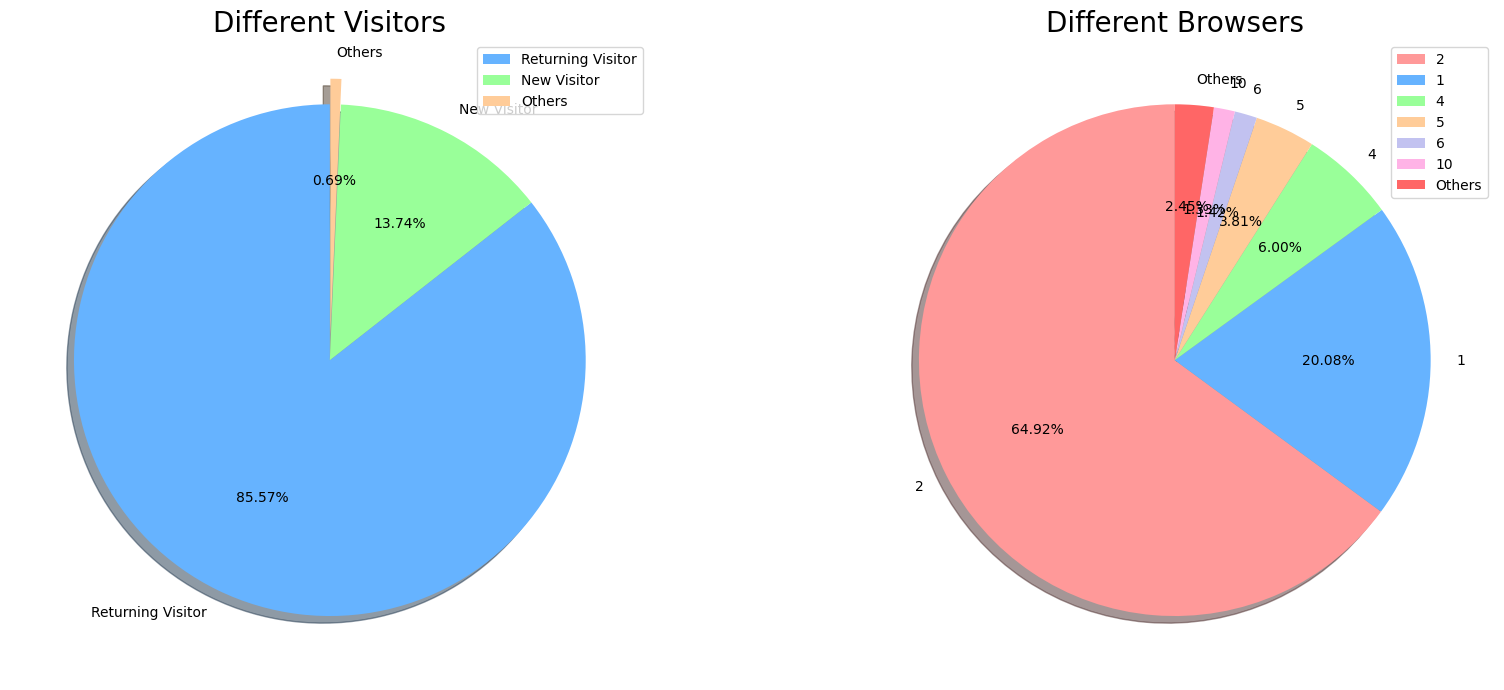

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 7)

# Plotting a pie chart for different types of visitors
size_visitor = [10551, 1694, 85]
colors_visitor = ['#66b3ff', '#99ff99', '#ffcc99']  # Adjusted colors
labels_visitor = ["Returning Visitor", "New Visitor", "Others"]
explode_visitor = [0, 0, 0.1]

plt.subplot(1, 2, 1)
plt.pie(size_visitor, colors=colors_visitor, labels=labels_visitor, explode=explode_visitor,
        shadow=True, autopct='%.2f%%', startangle=90)
plt.title('Different Visitors', fontsize=20)
plt.axis('off')
plt.legend()

# Plotting a pie chart for different browsers
size_browsers = [7961, 2462, 736, 467, 174, 163, 300]
colors_browsers = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']  # Adjusted colors
labels_browsers = ["2", "1", "4", "5", "6", "10", "Others"]

plt.subplot(1, 2, 2)
plt.pie(size_browsers, colors=colors_browsers, labels=labels_browsers,
        shadow=True, autopct='%.2f%%', startangle=90)
plt.title('Different Browsers', fontsize=20)
plt.axis('off')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


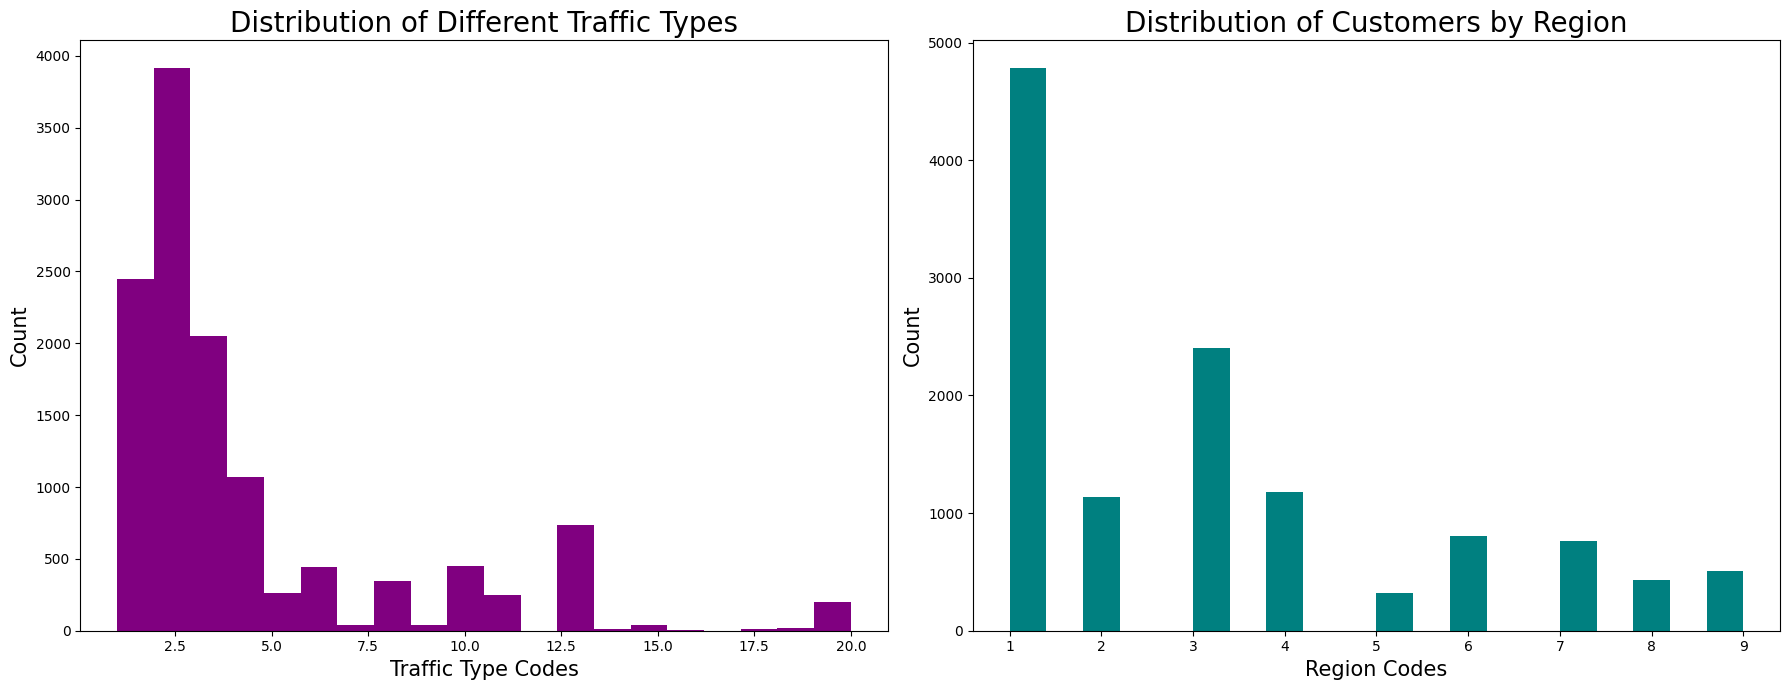

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 7)

# Plotting the distribution of different Traffic Types
plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color='purple', bins=20)
plt.title('Distribution of Different Traffic Types', fontsize=20)
plt.xlabel('Traffic Type Codes', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Plotting the distribution of customers around the Region
plt.subplot(1, 2, 2)
plt.hist(data['Region'], color='teal', bins=20)
plt.title('Distribution of Customers by Region', fontsize=20)
plt.xlabel('Region Codes', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.tight_layout()
plt.show()


In [ ]:
operating_system_counts = data['OperatingSystems'].value_counts()

print("Operating System Distribution:")
print(operating_system_counts)


Operating System Distribution:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


In [ ]:
month_counts = data['Month'].value_counts()

print("Month-wise Customer Visits:")
print(month_counts)


Month-wise Customer Visits:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


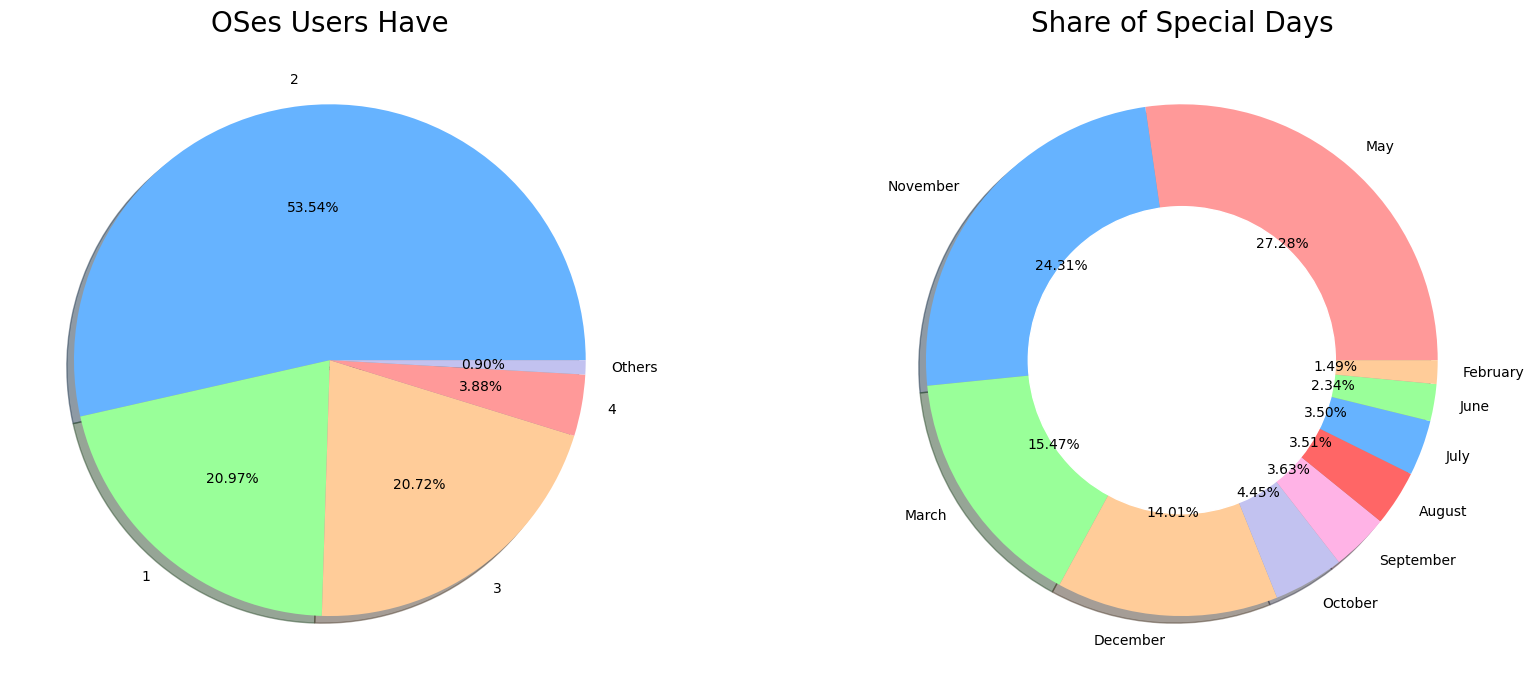

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 7)

# Creating a donut chart for different number of OSes users have
size_os = [6601, 2585, 2555, 478, 111]
colors_os = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0']  # Adjusted colors
labels_os = ["2", "1", "3", "4", "Others"]
explode_os = [0, 0, 0, 0, 0]

plt.subplot(1, 2, 1)
plt.pie(size_os, colors=colors_os, labels=labels_os, explode=explode_os, shadow=True, autopct='%.2f%%')
plt.title('OSes Users Have', fontsize=20)

# Creating a donut chart for the share of special days
size_days = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors_days = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#66b3ff', '#99ff99', '#ffcc99']  # Adjusted colors
labels_days = ["May", "November", "March", "December", "October", "September", "August", "July", "June", "February"]
explode_days = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.subplot(1, 2, 2)
plt.pie(size_days, colors=colors_days, labels=labels_days, explode=explode_days, shadow=True, autopct='%.2f%%')
plt.title('Share of Special Days', fontsize=20)

# Adding a white circle to create the donut chart effect
circle = plt.Circle((0, 0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


**Bi-Variate Analysis**

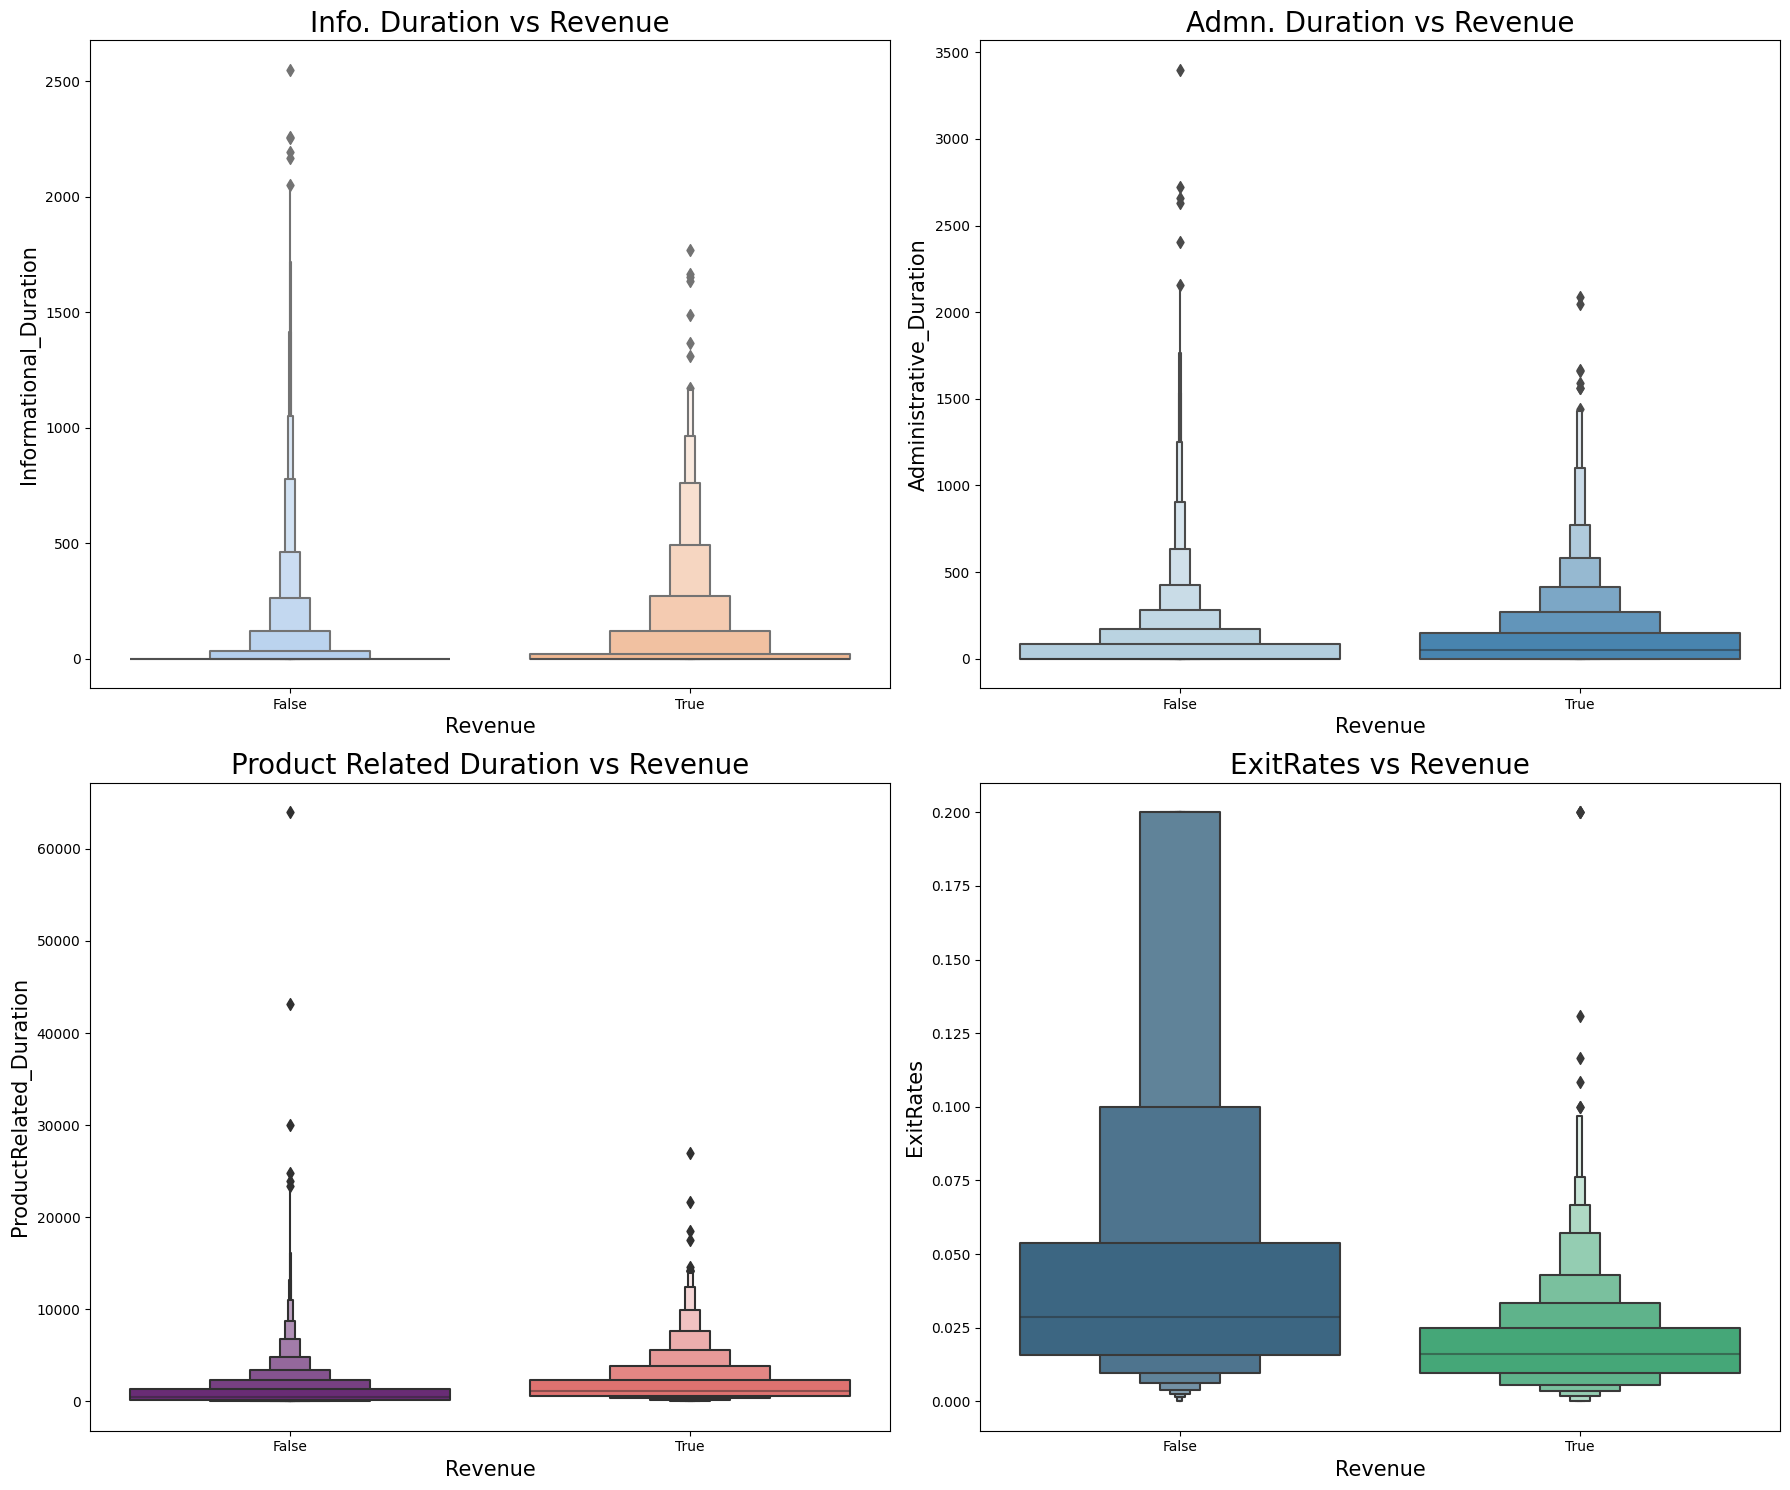

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 15)

# Creating boxen plots for different attributes vs Revenue
attributes = ['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration', 'ExitRates']
titles = ['Info. Duration vs Revenue', 'Admn. Duration vs Revenue', 'Product Related Duration vs Revenue', 'ExitRates vs Revenue']
colors = ['pastel', 'Blues', 'magma', 'viridis']  # Adjusted colors

for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(data=data, x='Revenue', y=attributes[i], palette=colors[i])
    plt.title(titles[i], fontsize=20)
    plt.xlabel('Revenue', fontsize=15)
    plt.ylabel(attributes[i], fontsize=15)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<ipython-input-37-11ef5c8306ac>:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=data, x='Revenue', y='PageValues', palette='Oranges')  # Adjusted color palette
<ipython-input-37-11ef5c8306ac>:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=data, x='Revenue', y='BounceRates', palette='Purples')  # Adjusted color palette


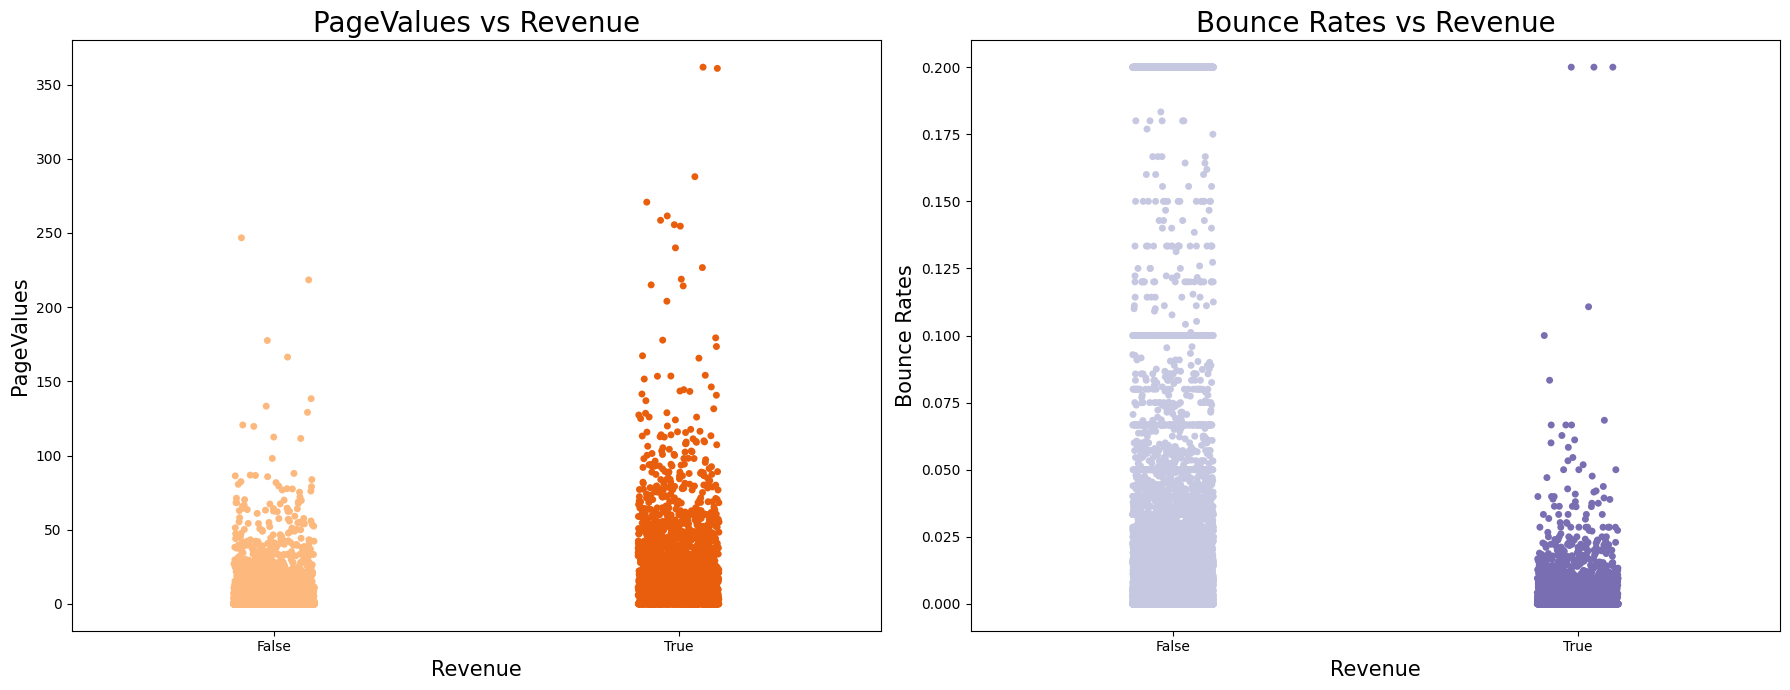

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 7)

# Creating strip plot for PageValues vs Revenue
plt.subplot(1, 2, 1)
sns.stripplot(data=data, x='Revenue', y='PageValues', palette='Oranges')  # Adjusted color palette
plt.title('PageValues vs Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('PageValues', fontsize=15)

# Creating strip plot for BounceRates vs Revenue
plt.subplot(1, 2, 2)
sns.stripplot(data=data, x='Revenue', y='BounceRates', palette='Purples')  # Adjusted color palette
plt.title('Bounce Rates vs Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Bounce Rates', fontsize=15)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


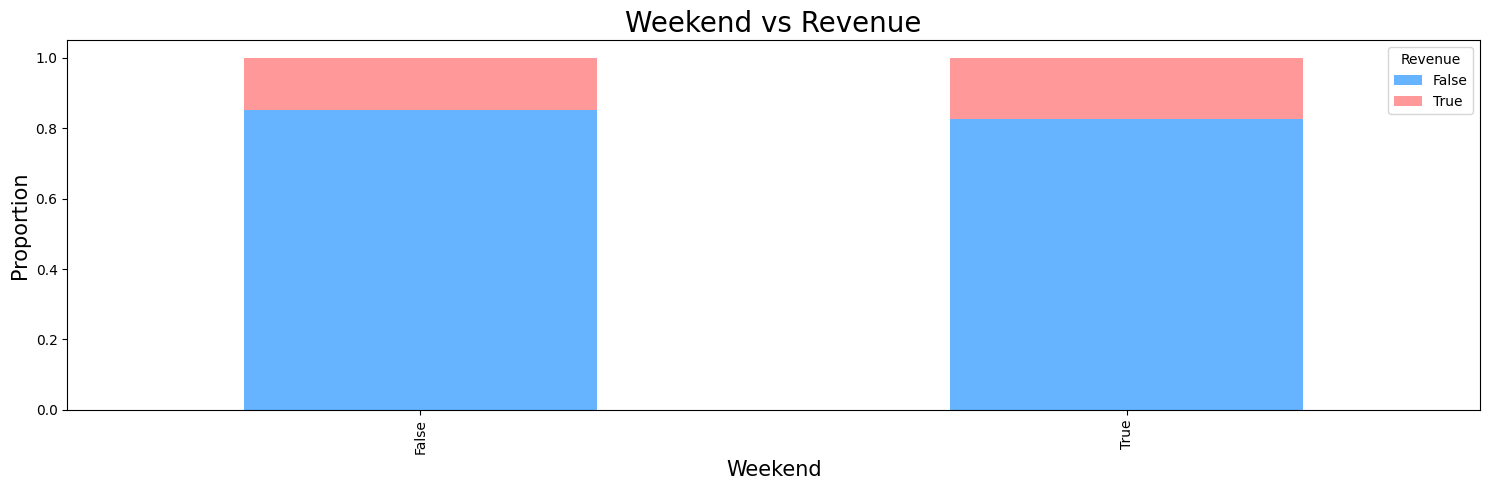

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cross-tabulation of 'Weekend' and 'Revenue'
df = pd.crosstab(data['Weekend'], data['Revenue'])

# Normalize the values to create stacked proportions
df_normalized = df.div(df.sum(1).astype(float), axis=0)

# Define custom colors
colors = ['#66b3ff', '#ff9999']  # Light blue for 'Weekend', Light red for 'Not Weekend'

# Plotting the stacked bar plot with custom colors
df_normalized.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)
plt.title('Weekend vs Revenue', fontsize=20)
plt.xlabel('Weekend', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

plt.tight_layout()  # Adjust spacing
plt.show()


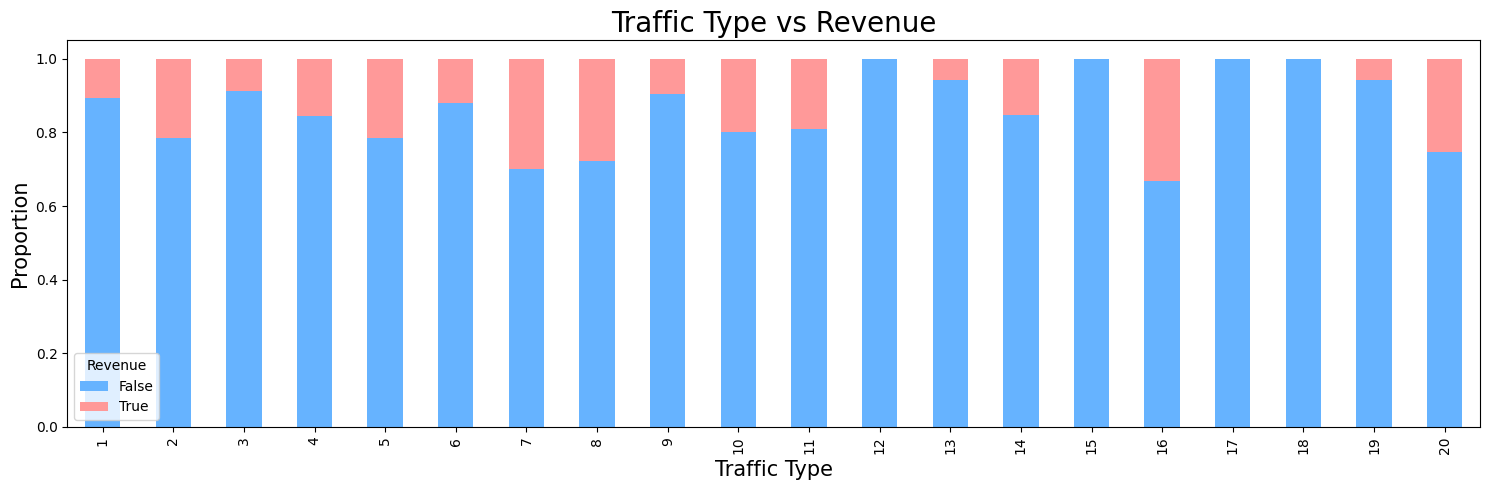

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cross-tabulation of 'TrafficType' and 'Revenue'
df = pd.crosstab(data['TrafficType'], data['Revenue'])

# Normalize the values to create stacked proportions
df_normalized = df.div(df.sum(1).astype(float), axis=0)

# Define custom colors
colors = ['#66b3ff', '#ff9999']  # Light blue for 'Revenue', Light red for 'Not Revenue'

# Plotting the stacked bar plot with custom colors
df_normalized.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)
plt.title('Traffic Type vs Revenue', fontsize=20)
plt.xlabel('Traffic Type', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

plt.tight_layout()  # Adjust spacing
plt.show()


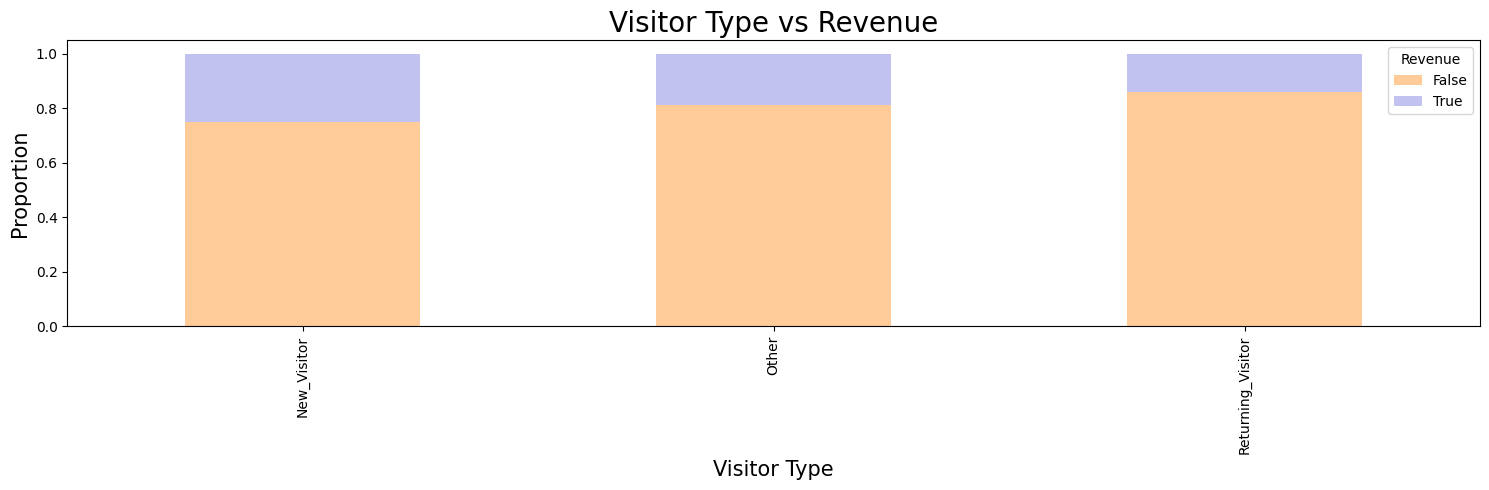

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cross-tabulation of 'VisitorType' and 'Revenue'
df = pd.crosstab(data['VisitorType'], data['Revenue'])

# Normalize the values to create stacked proportions
df_normalized = df.div(df.sum(1).astype(float), axis=0)

# Define custom colors
colors = ['#ffcc99', '#c2c2f0']  # Light green for 'Revenue', Dark green for 'Not Revenue'

# Plotting the stacked bar plot with custom colors
df_normalized.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)
plt.title('Visitor Type vs Revenue', fontsize=20)
plt.xlabel('Visitor Type', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

plt.tight_layout()  # Adjust spacing
plt.show()


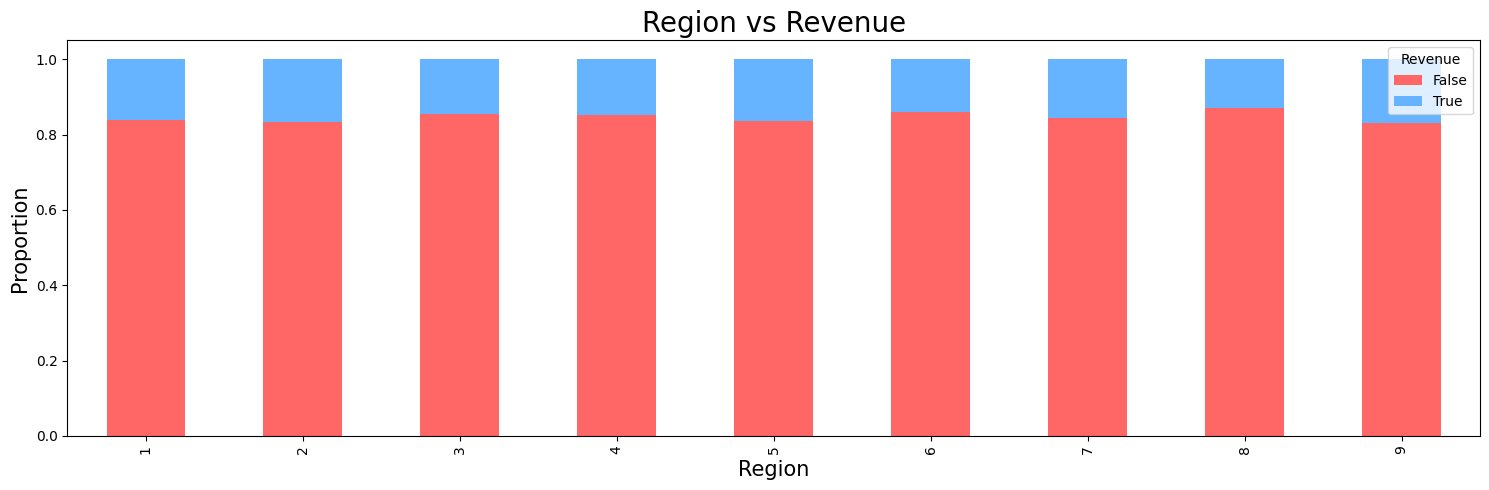

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cross-tabulation of 'Region' and 'Revenue'
df = pd.crosstab(data['Region'], data['Revenue'])

# Normalize the values to create stacked proportions
df_normalized = df.div(df.sum(1).astype(float), axis=0)

# Define custom bright colors
colors = ['#ff6666', '#66b3ff']  # Light blue for 'Revenue', Bright blue for 'Not Revenue'

# Plotting the stacked bar plot with custom colors
df_normalized.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)
plt.title('Region vs Revenue', fontsize=20)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

plt.tight_layout()  # Adjust spacing
plt.show()


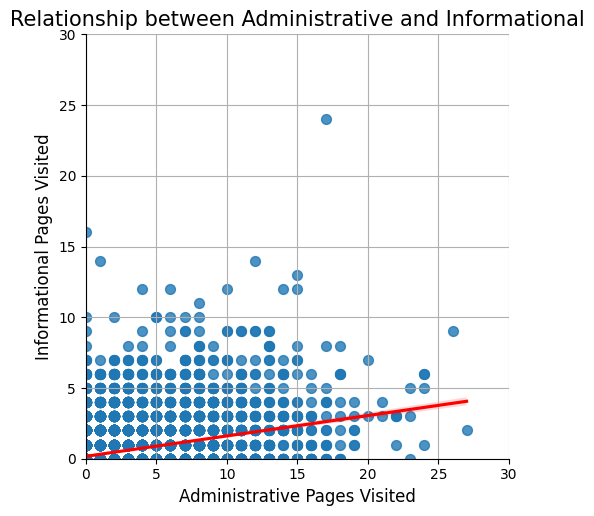

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (12, 8)

# Create an lm plot
lm_plot = sns.lmplot(x='Administrative', y='Informational', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set title and labels
plt.title('Relationship between Administrative and Informational', fontsize=15)
plt.xlabel('Administrative Pages Visited', fontsize=12)
plt.ylabel('Informational Pages Visited', fontsize=12)

# Customize plot appearance
lm_plot.set(xlim=(0, 30), ylim=(0, 30))  # Adjust axis limits
plt.grid(True)  # Add grid lines

# Show the plot
plt.show()


**Multi-Variate Analysis**

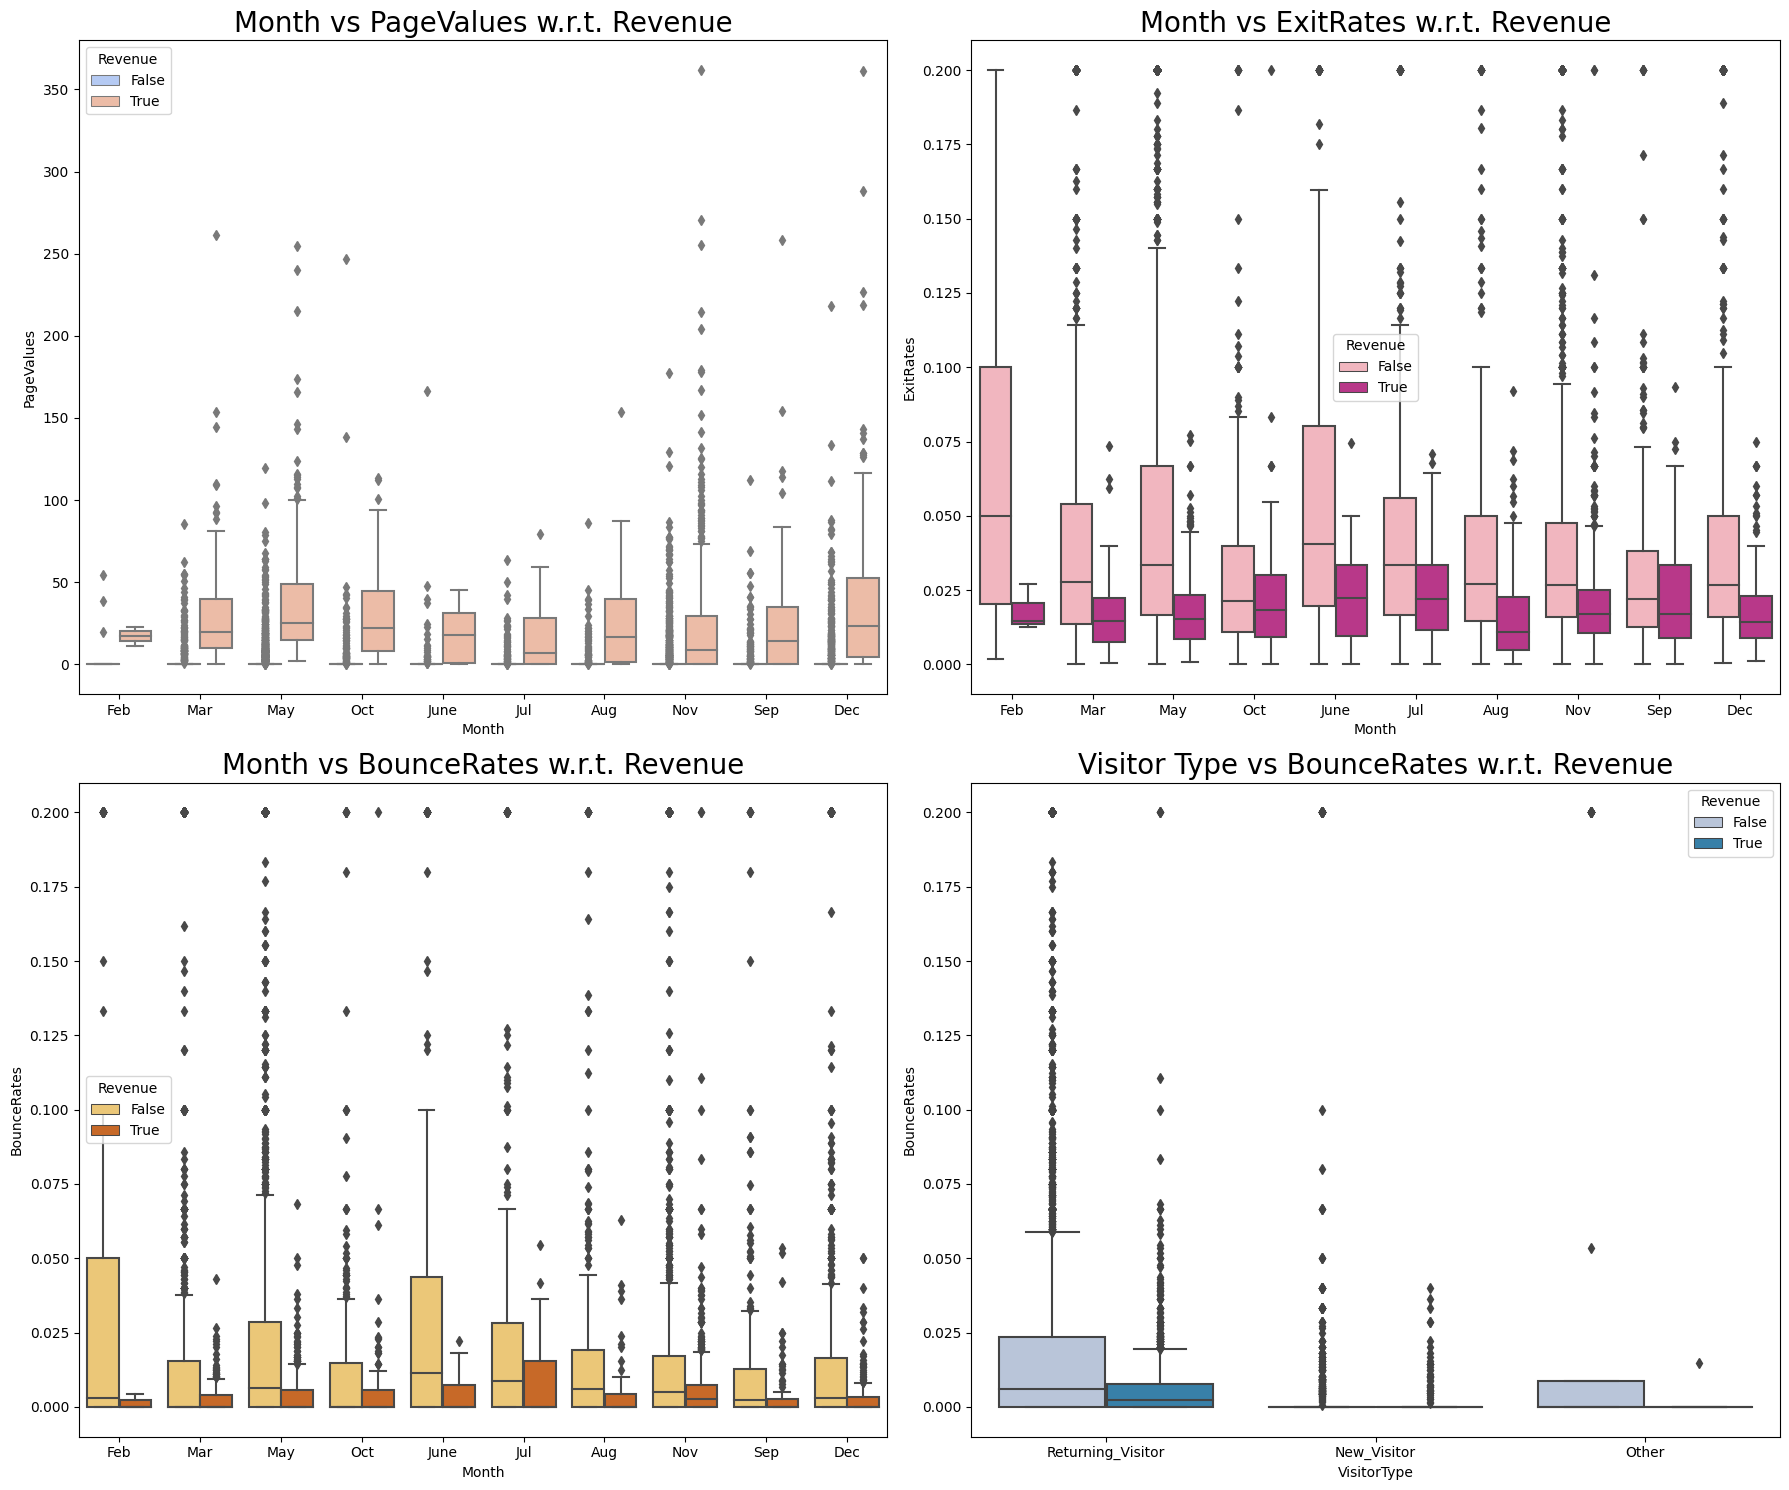

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 15)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Month vs PageValues w.r.t. Revenue
sns.boxplot(x=data['Month'], y=data['PageValues'], hue=data['Revenue'], palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Month vs PageValues w.r.t. Revenue', fontsize=20)

# Month vs ExitRates w.r.t. Revenue
sns.boxplot(x=data['Month'], y=data['ExitRates'], hue=data['Revenue'], palette='RdPu', ax=axes[0, 1])
axes[0, 1].set_title('Month vs ExitRates w.r.t. Revenue', fontsize=20)

# Month vs BounceRates w.r.t. Revenue
sns.boxplot(x=data['Month'], y=data['BounceRates'], hue=data['Revenue'], palette='YlOrBr', ax=axes[1, 0])
axes[1, 0].set_title('Month vs BounceRates w.r.t. Revenue', fontsize=20)

# Visitor Type vs BounceRates w.r.t. Revenue
sns.boxplot(x=data['VisitorType'], y=data['BounceRates'], hue=data['Revenue'], palette='PuBu', ax=axes[1, 1])
axes[1, 1].set_title('Visitor Type vs BounceRates w.r.t. Revenue', fontsize=20)

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


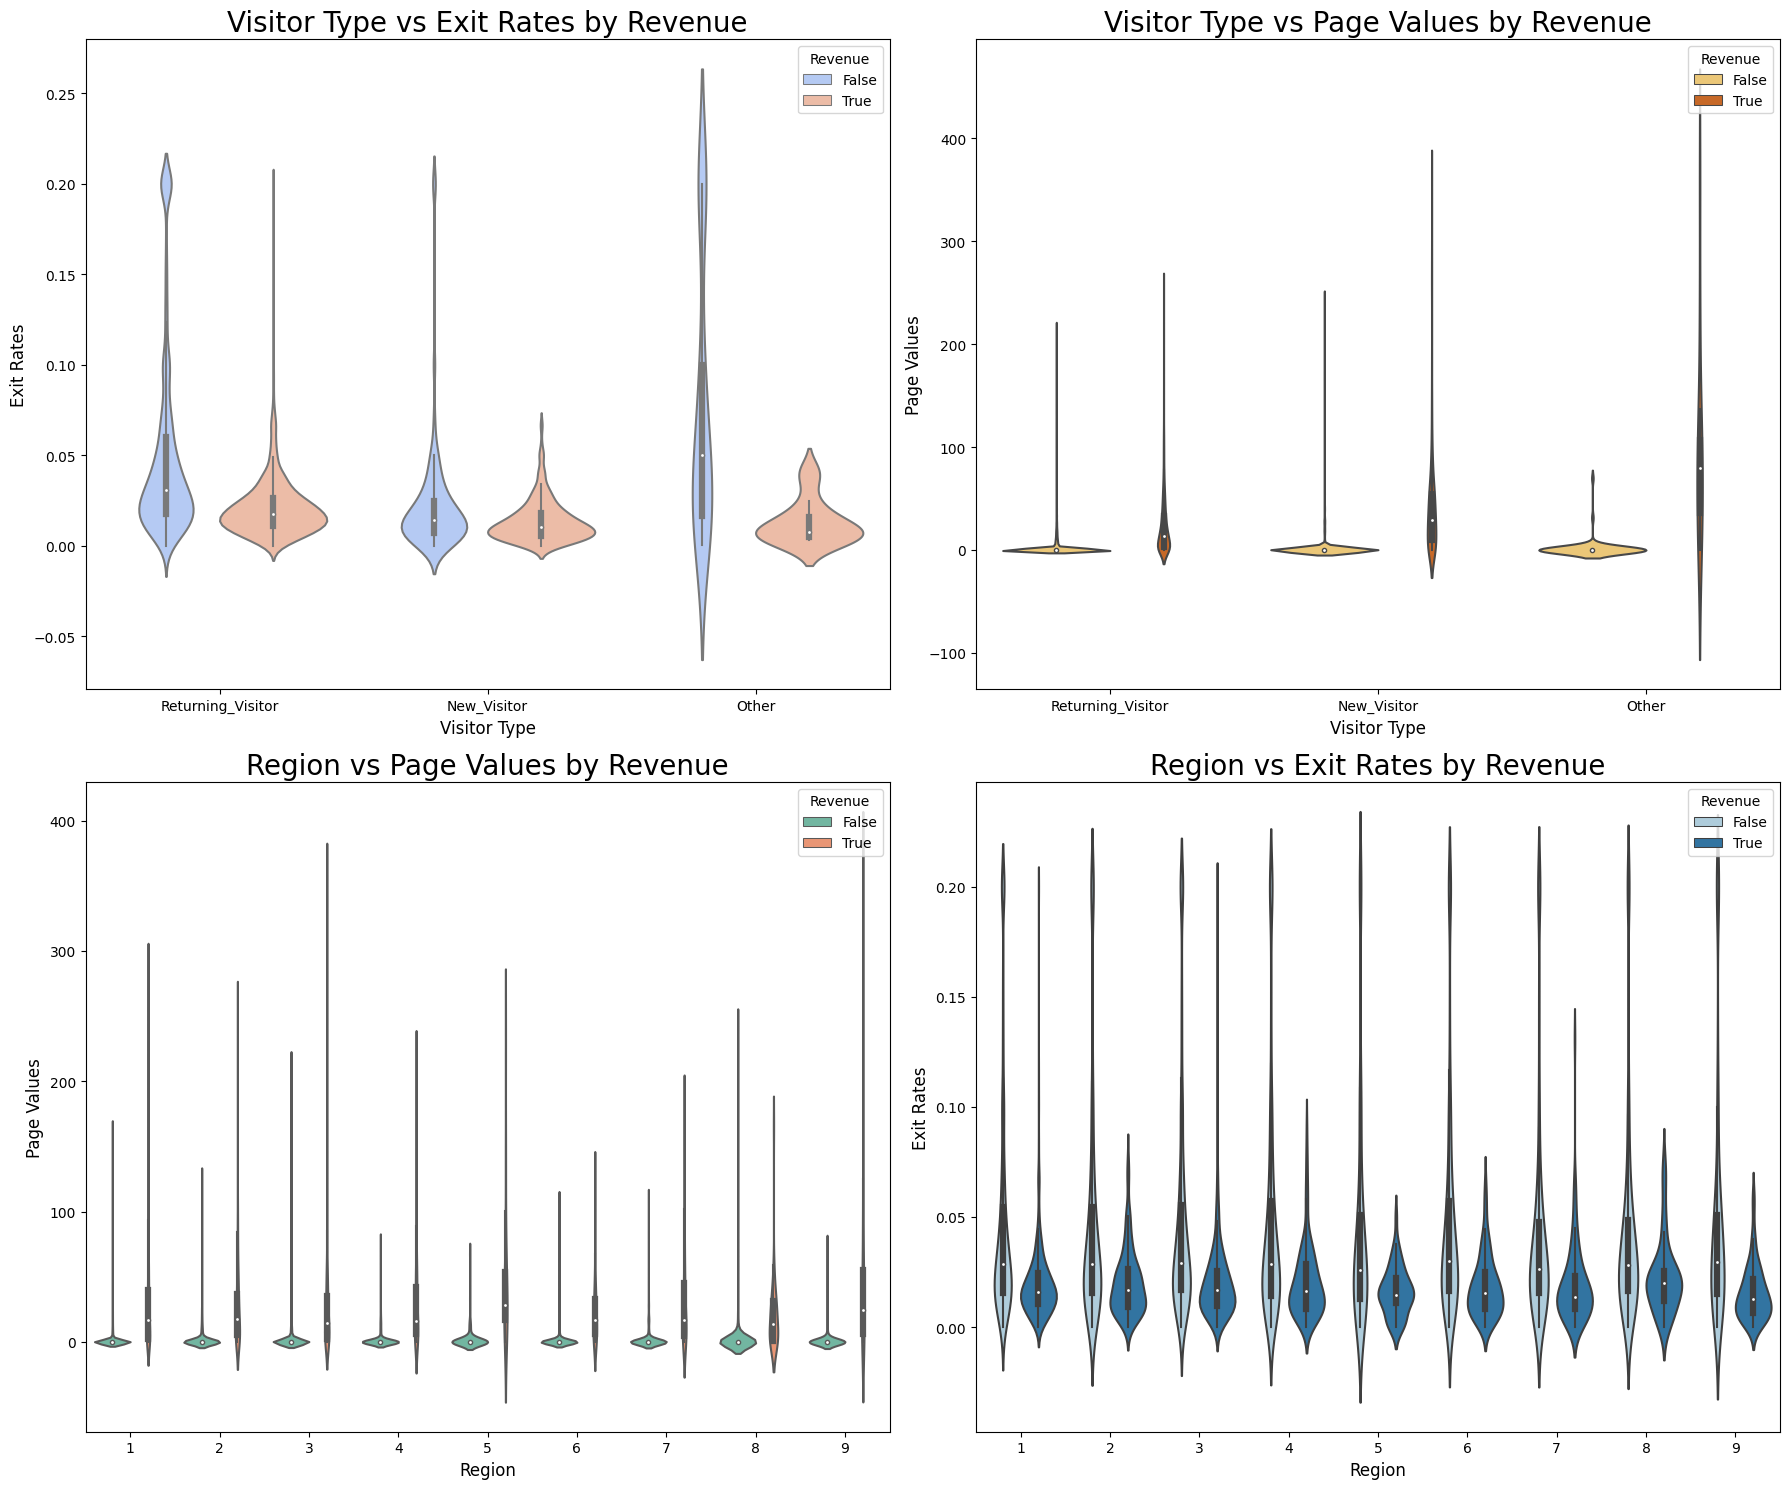

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 15)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Visitors vs ExitRates w.r.t. Revenue
sns.violinplot(x=data['VisitorType'], y=data['ExitRates'], hue=data['Revenue'], palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Visitor Type vs Exit Rates by Revenue', fontsize=20)
axes[0, 0].set_xlabel('Visitor Type', fontsize=12)
axes[0, 0].set_ylabel('Exit Rates', fontsize=12)

# Visitors vs PageValues w.r.t. Revenue
sns.violinplot(x=data['VisitorType'], y=data['PageValues'], hue=data['Revenue'], palette='YlOrBr', ax=axes[0, 1])
axes[0, 1].set_title('Visitor Type vs Page Values by Revenue', fontsize=20)
axes[0, 1].set_xlabel('Visitor Type', fontsize=12)
axes[0, 1].set_ylabel('Page Values', fontsize=12)

# Region vs PageValues w.r.t. Revenue
sns.violinplot(x=data['Region'], y=data['PageValues'], hue=data['Revenue'], palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Region vs Page Values by Revenue', fontsize=20)
axes[1, 0].set_xlabel('Region', fontsize=12)
axes[1, 0].set_ylabel('Page Values', fontsize=12)

# Region vs Exit Rates w.r.t. Revenue
sns.violinplot(x=data['Region'], y=data['ExitRates'], hue=data['Revenue'], palette='Paired', ax=axes[1, 1])
axes[1, 1].set_title('Region vs Exit Rates by Revenue', fontsize=20)
axes[1, 1].set_xlabel('Region', fontsize=12)
axes[1, 1].set_ylabel('Exit Rates', fontsize=12)

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Filling missing values with zeros
data.fillna(0, inplace=True)

# Checking if there are any remaining null values in the data after imputation
total_missing_values = data.isnull().sum().sum()
if total_missing_values == 0:
    print("All missing values have been successfully filled with zeros.")
else:
    print("There are still some missing values in the data.")


All missing values have been successfully filled with zeros.


**Trying to learn the user characteristics of in terms of time spent on the Website**

**1. Administrative Duration vs Bounce Rate**

**The Elbow Method to Find out the Maximum no. of Optimal Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


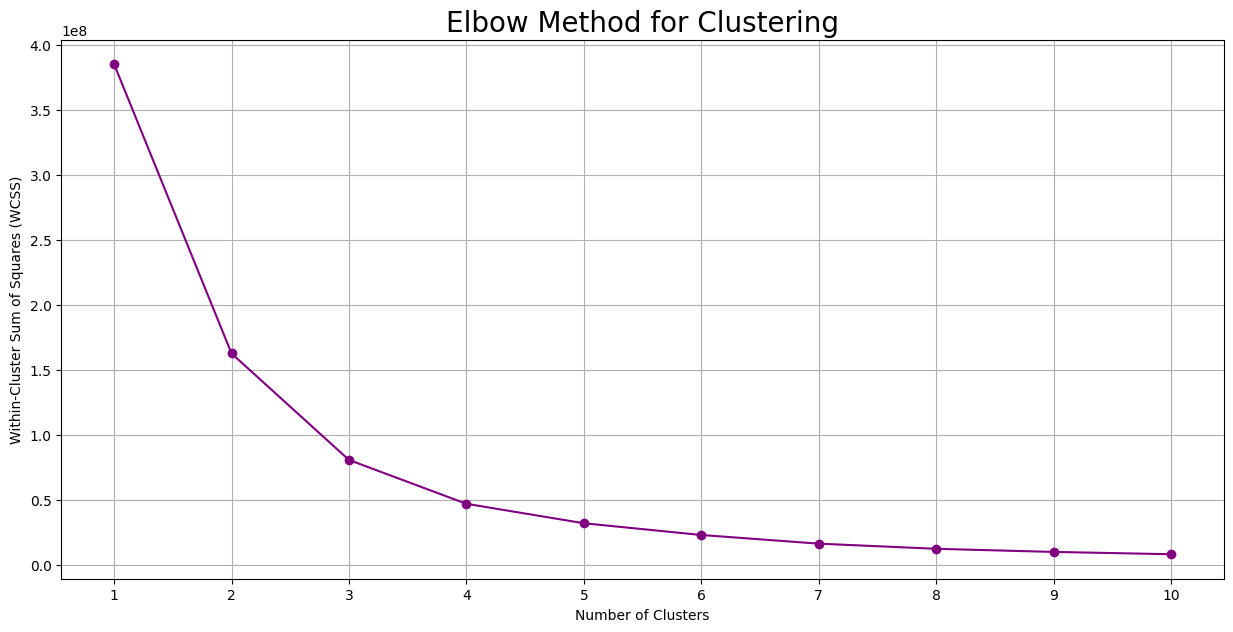

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract relevant columns for clustering
features_for_clustering = data[['Administrative_Duration', 'BounceRates']].values

# Determine the shape of the dataset
num_samples, num_features = features_for_clustering.shape

# Initialize a list to store within-cluster sum of squares (WCSS) values
wcss = []

# Perform K-means clustering for different number of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0,
                    algorithm='elkan',
                    tol=0.001)
    kmeans.fit(features_for_clustering)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine optimal number of clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='purple')
plt.grid()
plt.title('Elbow Method for Clustering', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, step=1))
plt.show()


**According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three. Let's go to the next step, i.e., Plotting the Clusters.**

**Visualizing the Cluster using Scatter Plot.**

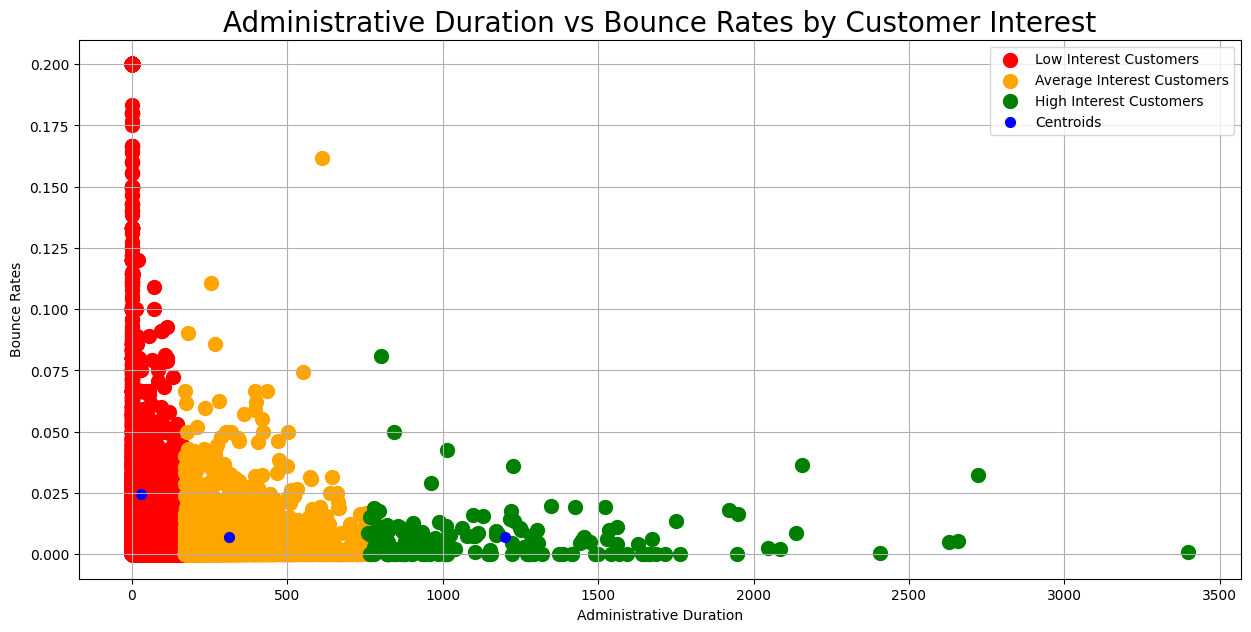

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Administrative_Duration', 'BounceRates']].values

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(clustering_data)

# Scatter plot of clustered data
plt.scatter(clustering_data[cluster_assignments == 0, 0], clustering_data[cluster_assignments == 0, 1],
            s=100, c='red', label='Low Interest Customers')
plt.scatter(clustering_data[cluster_assignments == 1, 0], clustering_data[cluster_assignments == 1, 1],
            s=100, c='orange', label='Average Interest Customers')
plt.scatter(clustering_data[cluster_assignments == 2, 0], clustering_data[cluster_assignments == 2, 1],
            s=100, c='green', label='High Interest Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='blue', label='Centroids')

# Customize the plot
plt.title('Administrative Duration vs Bounce Rates by Customer Interest', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()

# Show the plot
plt.show()


**Upon observing the clustering plot, we can confidently deduce that customers who spend an extended period of time in the administrative section of a website are significantly less inclined to quickly leave the site after viewing only one page.**

**The plot depicts three distinct clusters. The cluster highlighted in pink represents customers with the shortest administrative duration. This group exhibits the highest likelihood of swiftly navigating away from the website after viewing just one page.**

**In summary, the clustering analysis underscores a strong connection between the time customers spend on administrative tasks and their tendency to promptly exit the website after minimal interaction.**

**2. Informative Duration vs Bounce Rates**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


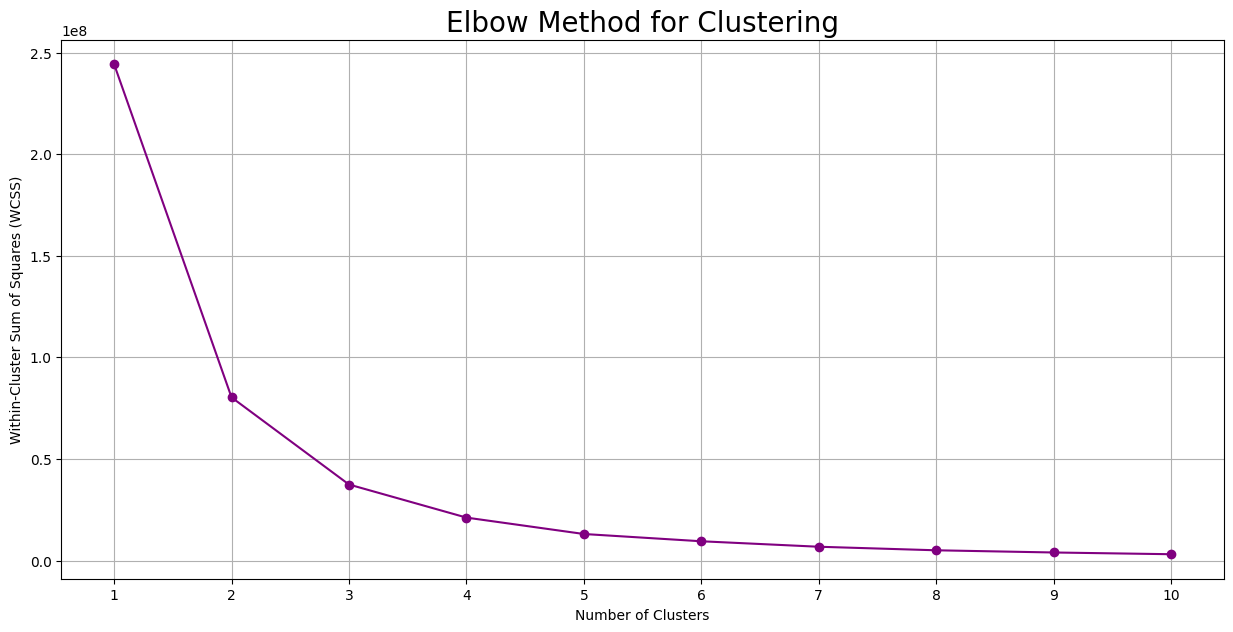

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Informational_Duration', 'BounceRates']].values

# Initialize a list to store within-cluster sum of squares (WCSS) values
wcss = []

# Perform K-means clustering for different number of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0,
                    algorithm='elkan',
                    tol=0.001)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine optimal number of clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='purple')
plt.grid()
plt.title('Elbow Method for Clustering', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, step=1))
plt.show()


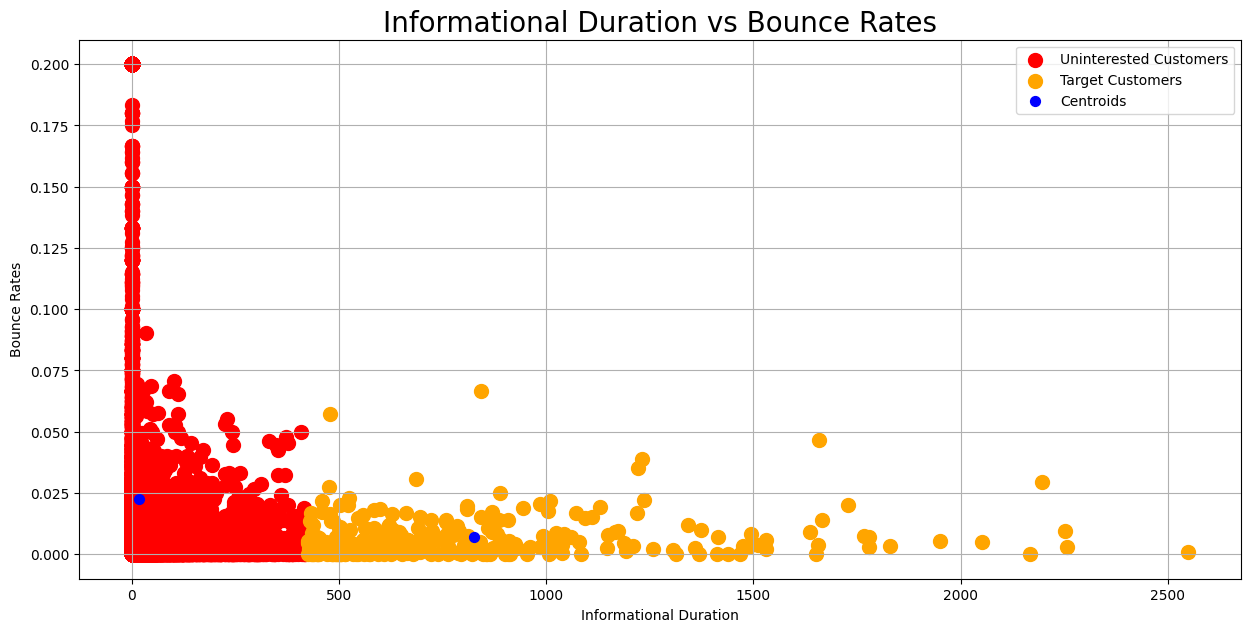

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Informational_Duration', 'BounceRates']].values

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(clustering_data)

# Scatter plot of clustered data
plt.scatter(clustering_data[cluster_assignments == 0, 0], clustering_data[cluster_assignments == 0, 1],
            s=100, c='red', label='Uninterested Customers')
plt.scatter(clustering_data[cluster_assignments == 1, 0], clustering_data[cluster_assignments == 1, 1],
            s=100, c='orange', label='Target Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='blue', label='Centroids')

# Customize the plot
plt.title('Informational Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()

# Show the plot
plt.show()


**3.Administrative Duration vs Exit Rates**

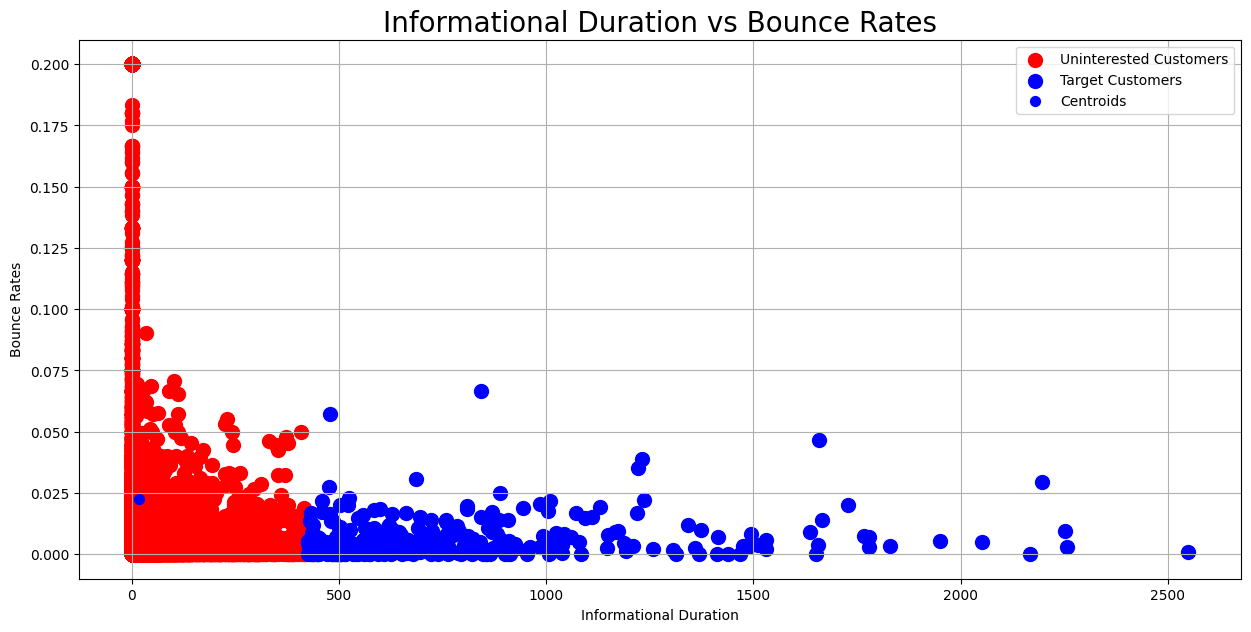

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Informational_Duration', 'BounceRates']].values

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(clustering_data)

# Scatter plot of clustered data
plt.scatter(clustering_data[cluster_assignments == 0, 0], clustering_data[cluster_assignments == 0, 1],
            s=100, c='red', label='Uninterested Customers')
plt.scatter(clustering_data[cluster_assignments == 1, 0], clustering_data[cluster_assignments == 1, 1],
            s=100, c='blue', label='Target Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='blue', label='Centroids')

# Customize the plot
plt.title('Informational Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()

# Show the plot
plt.show()


**Where from the Users of the Website come?**

**1. Region vs Traffic Type**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


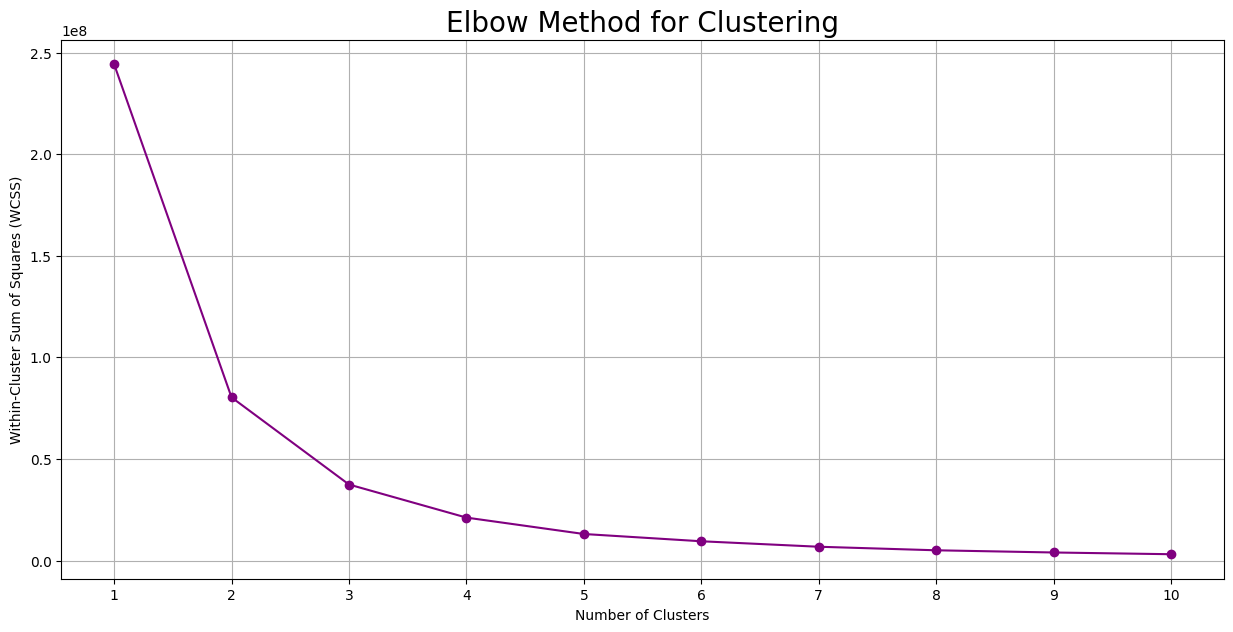

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Informational_Duration', 'BounceRates']].values

# Initialize a list to store within-cluster sum of squares (WCSS) values
wcss = []

# Perform K-means clustering for different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0,
                    algorithm='elkan',
                    tol=0.001)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine optimal number of clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='purple')
plt.grid()
plt.title('Elbow Method for Clustering', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, step=1))
plt.show()


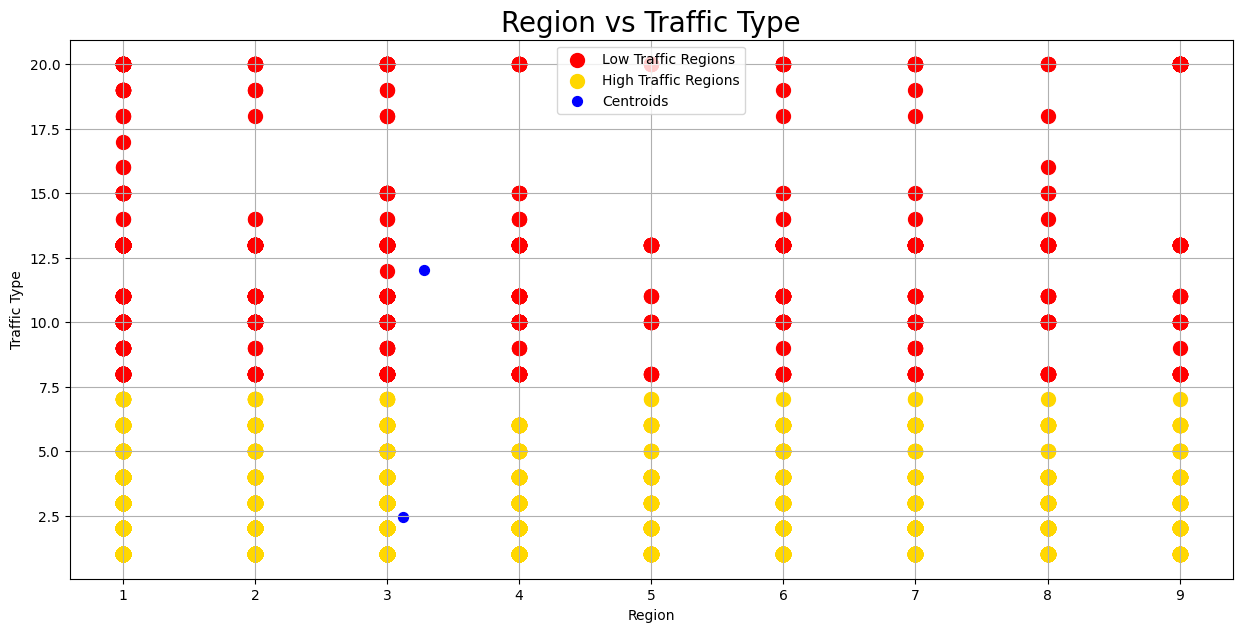

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Region', 'TrafficType']].values

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(clustering_data)

# Scatter plot of clustered data
plt.scatter(clustering_data[cluster_assignments == 0, 0], clustering_data[cluster_assignments == 0, 1],
            s=100, c='red', label='Low Traffic Regions')
plt.scatter(clustering_data[cluster_assignments == 1, 0], clustering_data[cluster_assignments == 1, 1],
            s=100, c='gold', label='High Traffic Regions')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='blue', label='Centroids')

# Customize the plot
plt.title('Region vs Traffic Type', fontsize=20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic Type')
plt.legend()

# Show the plot
plt.show()


**2. Adminstrative Duration vs Region**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


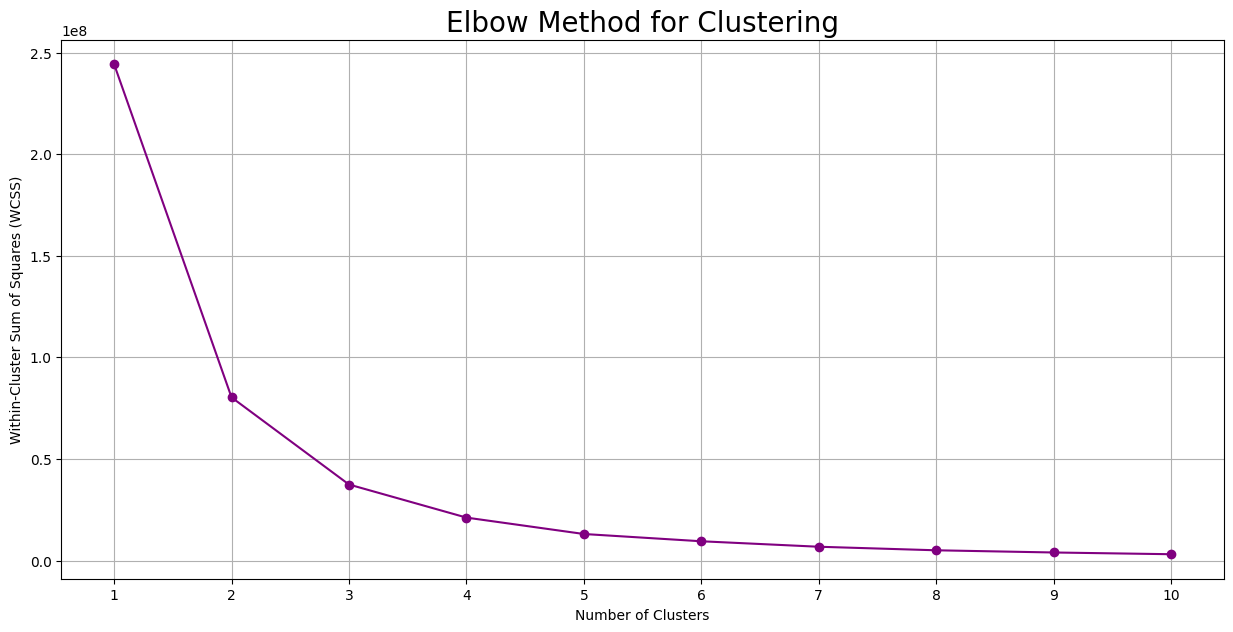

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Informational_Duration', 'BounceRates']].values

# Initialize a list to store within-cluster sum of squares (WCSS) values
wcss = []

# Perform K-means clustering for different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0,
                    algorithm='elkan',
                    tol=0.001)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine optimal number of clusters
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='purple')
plt.grid()
plt.title('Elbow Method for Clustering', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, step=1))
plt.show()


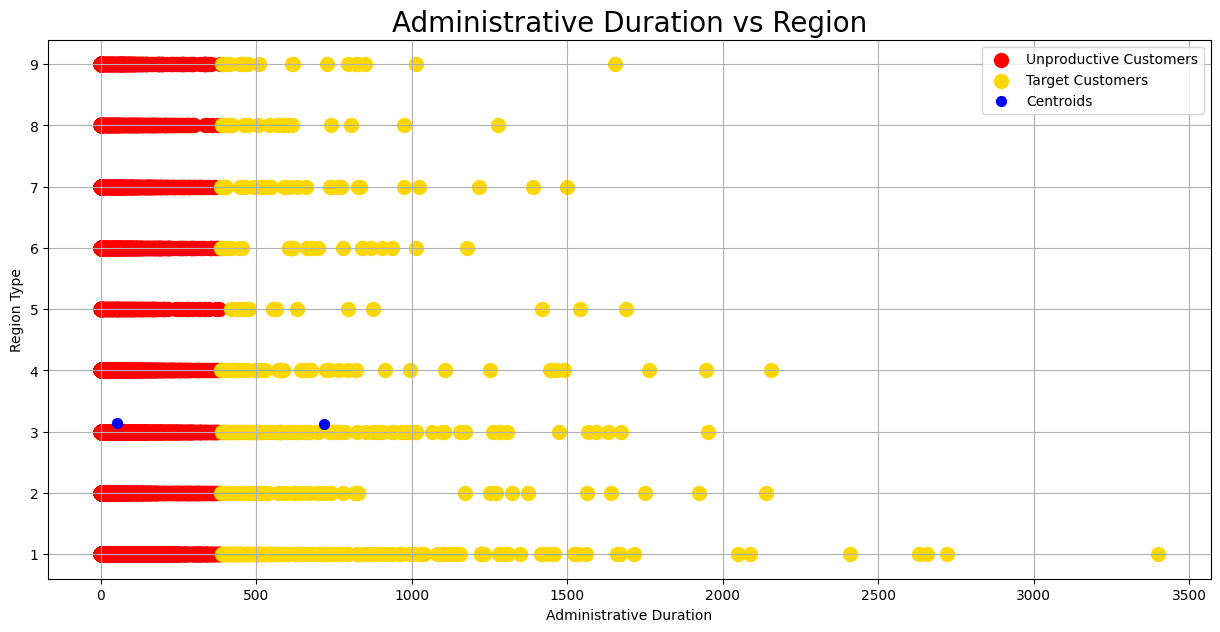

In [ ]:
# Extract relevant columns for clustering
clustering_data = data[['Administrative_Duration', 'Region']].values

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(clustering_data)

# Scatter plot of clustered data
plt.scatter(clustering_data[cluster_assignments == 0, 0], clustering_data[cluster_assignments == 0, 1],
            s=100, c='red', label='Unproductive Customers')
plt.scatter(clustering_data[cluster_assignments == 1, 0], clustering_data[cluster_assignments == 1, 1],
            s=100, c='gold', label='Target Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='blue', label='Centroids')

# Customize the plot
plt.title('Administrative Duration vs Region', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()

# Show the plot
plt.show()


**Data Preprocessing**

**One Hot and Label Encoding**

In [19]:
# one hot encoding

data1 = pd.get_dummies(data)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Revenue' column
data['Revenue'] = label_encoder.fit_transform(data['Revenue'])

# Display the count of encoded values
print(data['Revenue'].value_counts())


0    10422
1     1908
Name: Revenue, dtype: int64


In [ ]:
# Extracting the independent and dependent variables
x = data1.drop(['Revenue'], axis=1)
y = data['Revenue']

# Checking the shapes of the variables
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)



Shape of x: (12330, 28)
Shape of y: (12330,)


**Splitting of the Data**

In [21]:
# Define your features (x) and target variable (y)
x = data1.drop(['Revenue'], axis=1)
y = data['Revenue']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Checking the shapes
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (8631, 28)
Shape of y_train: (8631,)
Shape of x_test: (3699, 28)
Shape of y_test: (3699,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.decomposition import PCA

# Specify the number of components you want to keep
num_components = 2

pca = PCA(n_components=num_components)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


**Random Forest Classifier**

Training Accuracy: 1.0
Testing Accuracy: 0.8948364422816978
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.76      0.55      0.64       622

    accuracy                           0.89      3699
   macro avg       0.84      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699



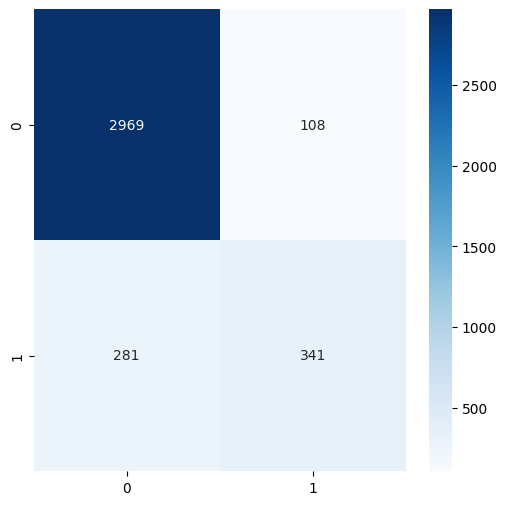

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Creating a Random Forest Classifier model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model
training_accuracy = model.score(x_train, y_train)
testing_accuracy = model.score(x_test, y_test)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Creating a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Generating a classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.886339937434828
Testing Accuracy: 0.8721276020546094


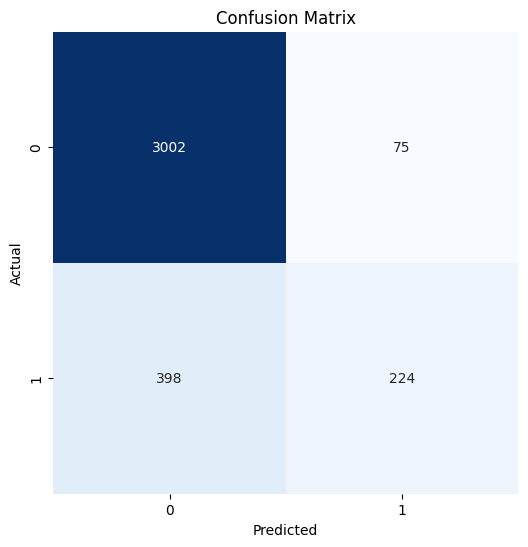

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      3077
        True       0.75      0.36      0.49       622

    accuracy                           0.87      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.86      0.87      0.85      3699



In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict using the trained model
y_pred = model.predict(x_test)

# Evaluate the model
training_accuracy = model.score(x_train, y_train)
testing_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate and display the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**AdaBoost**

Training Accuracy: 0.8570269957131271
Testing Accuracy: 0.8350905650175723


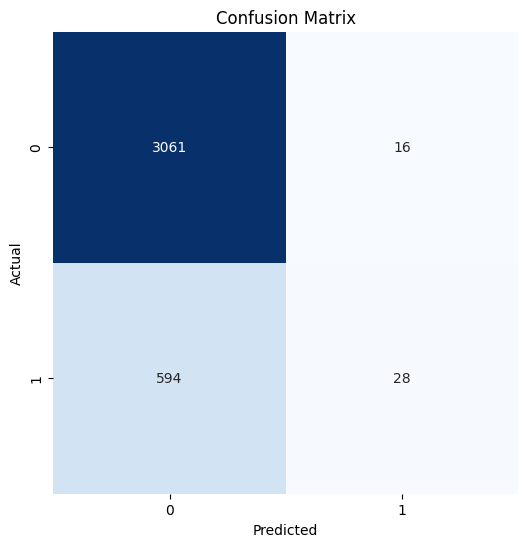

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3077
           1       0.64      0.05      0.08       622

    accuracy                           0.84      3699
   macro avg       0.74      0.52      0.50      3699
weighted avg       0.80      0.84      0.77      3699



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create an AdaBoostClassifier model
model = AdaBoostClassifier()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict using the trained model
y_pred = model.predict(x_test)

# Evaluate the model
training_accuracy = model.score(x_train, y_train)
testing_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate and display the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**Decision Tree**

Training Accuracy: 1.0
Testing Accuracy: 0.7672343876723439


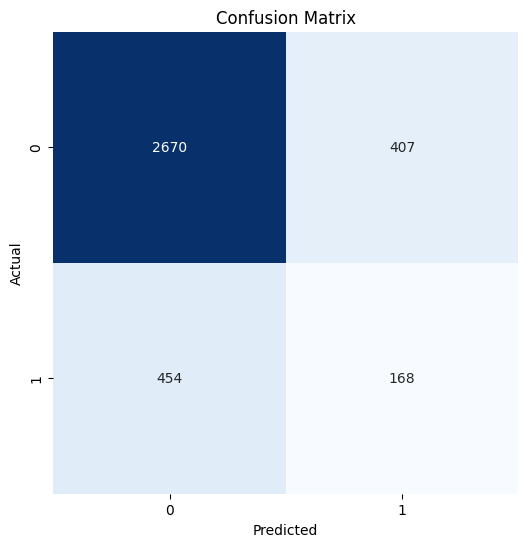

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3077
           1       0.29      0.27      0.28       622

    accuracy                           0.77      3699
   macro avg       0.57      0.57      0.57      3699
weighted avg       0.76      0.77      0.76      3699



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict using the trained model
y_pred = model.predict(x_test)

# Evaluate the model
training_accuracy = model.score(x_train, y_train)
testing_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate and display the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**SVC**

Training Accuracy: 0.8522766770941953
Testing Accuracy: 0.8331981616653149


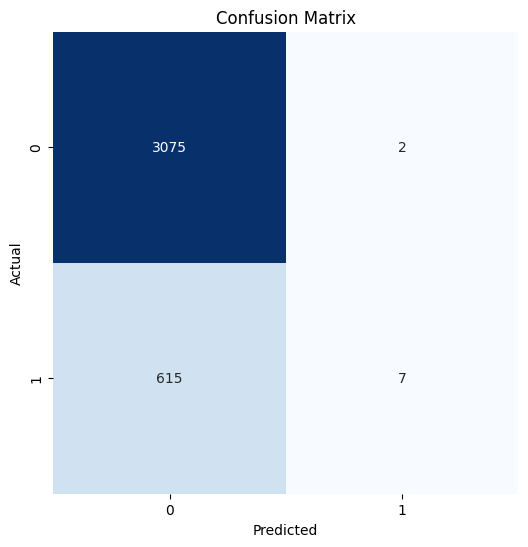

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3077
           1       0.78      0.01      0.02       622

    accuracy                           0.83      3699
   macro avg       0.81      0.51      0.47      3699
weighted avg       0.82      0.83      0.76      3699



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Create an SVC model
model = SVC()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict using the trained model
y_pred = model.predict(x_test)

# Evaluate the model
training_accuracy = model.score(x_train, y_train)
testing_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate and display the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


In [ ]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())


Mean Accuracy : 0.8518129586713018
Mean Standard Deviation : 0.0012411764223738168


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for LogisticRegression
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs']}

# Initialize the LogisticRegression estimator
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid_search = grid_search.fit(x_train, y_train)

# Getting results
print("Best Accuracy :", grid_search.best_score_)
print("Best Parameters :", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Accuracy : 0.8890038318546486
Best Parameters : {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [34]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy : 0.8857602677996652
Mean Standard Deviation : 0.008786561041947367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluating Model**

In [3]:
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=1d566fa595da55b460b0ff19df96b1353c7e87e80547d07326eb0d34a5a160a2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [26]:
import eli5
from eli5.sklearn import PermutationImportance

# Creating a Permutation Importance object and fitting it to the test data
perm = PermutationImportance(model, random_state=0).fit(x_test, y_test)

# Displaying the feature importance scores using eli5
eli5.show_weights(perm, feature_names=x_test.columns.tolist())


Weight,Feature
0.0957 ± 0.0057,PageValues
0.0020 ± 0.0009,TrafficType
0.0016 ± 0.0022,Region
0.0014 ± 0.0009,ProductRelated
0.0011 ± 0.0006,VisitorType_Returning_Visitor
0.0010 ± 0.0014,ProductRelated_Duration
0.0008 ± 0.0021,OperatingSystems
0.0008 ± 0.0006,Administrative
0.0005 ± 0.0004,Month_May
0.0005 ± 0.0002,Administrative_Duration


**Partial Dependency Plots**

In [ ]:
pip install pdpbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.2 MB/s eta 0:00:00


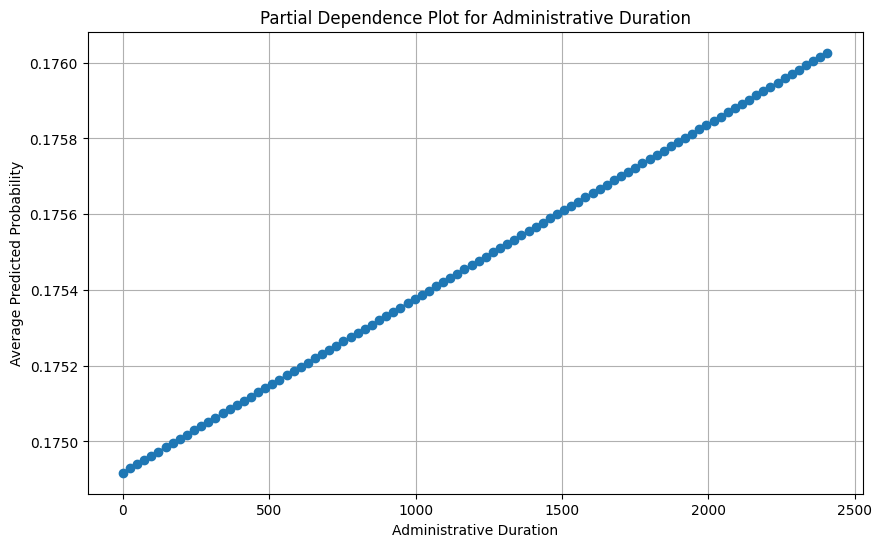

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Choose the feature for which you want to create a partial dependence plot
feature_index = x_test.columns.get_loc('Administrative_Duration')

# Define a range of values for the selected feature
feature_values = np.linspace(x_test.iloc[:, feature_index].min(), x_test.iloc[:, feature_index].max(), num=100)

# Initialize an empty array to store the partial dependence values
partial_dependence_values = []

# Calculate the predicted probabilities for each value of the selected feature
for value in feature_values:
    x_modified = x_test.copy()
    x_modified.iloc[:, feature_index] = value
    partial_dependence_values.append(model.predict_proba(x_modified)[:, 1].mean())  # Assuming binary classification

# Create the partial dependence plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(feature_values, partial_dependence_values, marker='o')
plt.xlabel('Administrative Duration')
plt.ylabel('Average Predicted Probability')
plt.title('Partial Dependence Plot for Administrative Duration')
plt.grid(True)
plt.show()


In [ ]:
pip install -U pdpbox


In [36]:
pip install -U shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.3 MB/s eta 0:00:00


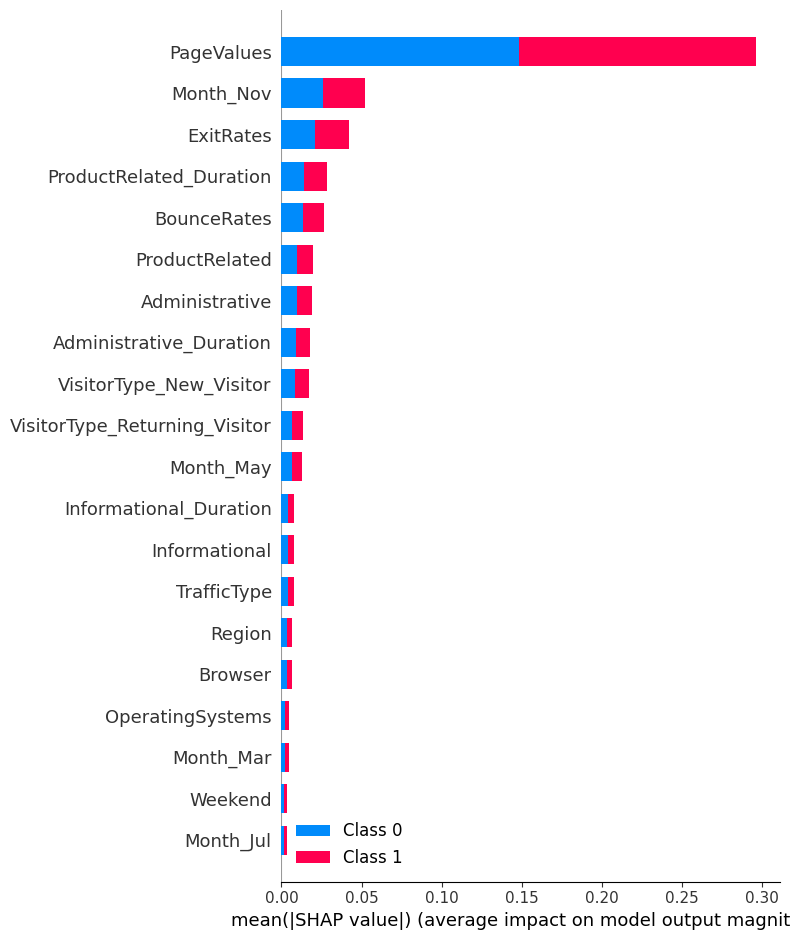

In [43]:
# Import necessary libraries
import shap
shap.initjs()

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(x_test)

# Plot summary plot
shap.summary_plot(shap_values, x_test, plot_type='bar')


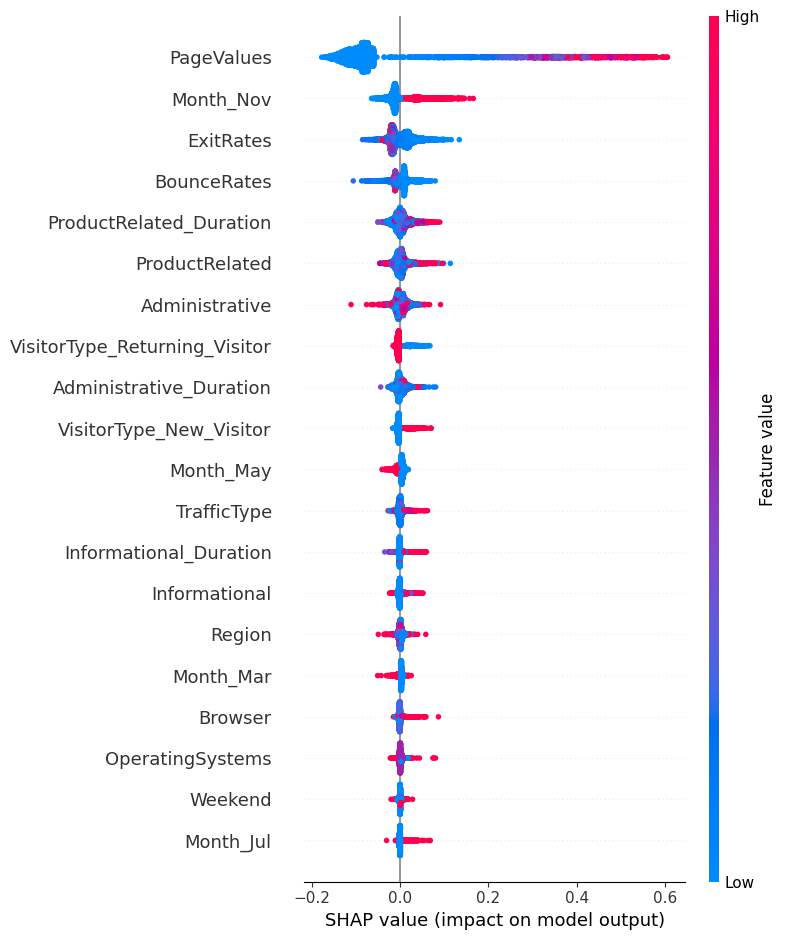

In [ ]:
shap.summary_plot(shap_values[1], x_test)